In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
import scipy.special as sc
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import IsolationForest

/home/nate/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('full_ak.csv')

natural = []

for idx, row in df.iterrows():
    if row[2] == 'Lightning':
        natural.append(1)
    else:
        natural.append(0)

df['natural_cause'] = natural

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'STAT_CAUSE_DESCR', 'LATITUDE',
       'LONGITUDE', 'STATE', 'DISCOVERY_DATE', 'FIRE_SIZE', 'DATE', 'MONTH',
       'YEAR', 'DAY_OF_WEEK', 'MTHYR', 'tmax_5', 'tmin_5', 'prcp_5', 'snow_5',
       'last_7', 'last_14', 'last_28', 'natural_cause'],
      dtype='object')

In [4]:
df = df[(df['tmax_5'] < 50) & (df['tmax_5'] > -80)]

In [5]:
dfs = df[df['FIRE_SIZE']<100]

data = pd.concat([dfs.iloc[:,7], dfs.iloc[:,13], dfs.iloc[:,20]], axis=1)

endog = data.FIRE_SIZE

exog = data[['tmax_5', 'natural_cause']]
exog = sm.add_constant(exog)

formula = 'data.iloc[:,0] ~ data.iloc[:,1] + data.iloc[:,2]'

gamma = sm.GLM(endog, exog, family=sm.families.Gamma()).fit()

gamma.summary()

/home/nate/anaconda/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              FIRE_SIZE   No. Observations:                11034
Model:                            GLM   Df Residuals:                    11031
Model Family:                   Gamma   Df Model:                            2
Link Function:          inverse_power   Scale:              17.668358513853406
Method:                          IRLS   Log-Likelihood:                -24093.
Date:                Wed, 04 Apr 2018   Deviance:                       42370.
Time:                        10:14:11   Pearson chi2:                 1.95e+05
No. Iterations:                     8                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6321      0.033     19.295      0.000       0.568       0.696
tmax_5           -0.0008      0.001     -0.795      0.426      -0.003       0.001
natural_cause    -0.5299      0.030    -17.696      0.000      -0.589      -0.471
=================================================================================
"""

In [6]:
dfb = df[df['FIRE_SIZE']>100]
#dfb['FIRE_SIZE'] = dfb['FIRE_SIZE'].apply(np.log)


data = pd.concat([dfb.iloc[:,7], dfb.iloc[:,13], dfb.iloc[:,20]], axis=1)

endog = data.FIRE_SIZE

exog = data[['tmax_5', 'natural_cause']]
exog = sm.add_constant(exog)

formula = 'data.iloc[:,0] ~ data.iloc[:,1] + data.iloc[:,2]'

gamma = sm.GLM(endog, exog, family=sm.families.Gamma()).fit()

gamma.summary()

/home/nate/anaconda/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              FIRE_SIZE   No. Observations:                 1767
Model:                            GLM   Df Residuals:                     1764
Model Family:                   Gamma   Df Model:                            2
Link Function:          inverse_power   Scale:               7.700271767611629
Method:                          IRLS   Log-Likelihood:                -18440.
Date:                Wed, 04 Apr 2018   Deviance:                       6986.3
Time:                        10:14:11   Pearson chi2:                 1.36e+04
No. Iterations:                     7                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001   2.41e-05      5.242      0.000     7.9e-05       0.000
tmax_5        -1.636e-06   7.23e-07     -2.264      0.024   -3.05e-06    -2.2e-07
natural_cause -3.331e-05   2.05e-05     -1.628      0.104   -7.34e-05    6.79e-06
=================================================================================
"""

In [7]:
big = len(df[df['FIRE_SIZE']>100])/len(df)
big

0.13783151326053042

In [8]:
len(df[df['natural_cause']==1])/len(df)

0.31965678627145083

In [9]:
len(df[(df['FIRE_SIZE']>100) & (df['natural_cause']==1)])/len(df[df['FIRE_SIZE']>100])

0.8964346349745331

In [10]:
len(df[(df['FIRE_SIZE']<100) & (df['natural_cause']==1)])/len(df[df['FIRE_SIZE']<100])

0.22684429943810042

In [11]:
len(df[(df['FIRE_SIZE']>100) & (df['natural_cause']==1)])/len(df[df['natural_cause']==1])

0.38653001464128844

In [12]:
df[df['FIRE_SIZE']<100].describe()

,Unnamed: 0,Unnamed: 0.1,LATITUDE,LONGITUDE,DISCOVERY_DATE,FIRE_SIZE,MONTH,YEAR,tmax_5,tmin_5,prcp_5,snow_5,last_7,last_14,last_28,natural_cause
count,11034.000000,11034.000000,11034.000000,11034.000000,1.103400e+04,11034.000000,11034.000000,11034.000000,11034.000000,11034.000000,11034.000000,11034.000000,11034.000000,11034.000000,11034.000000,11034.000000
mean,296.573319,296.573319,62.713115,-148.696536,2.452781e+06,3.970731,6.044318,2002.927044,17.388916,4.978385,4.043411,0.065887,35.495015,87.086732,188.672739,0.226844
std,187.717271,187.717271,2.428191,5.436207,2.607624e+03,12.685029,1.347167,7.141436,8.541037,7.056970,20.145083,2.730519,80.947344,152.360013,298.014332,0.418810
min,0.000000,0.000000,52.048800,-173.385700,2.448718e+06,0.010000,1.000000,1992.000000,-51.100000,-57.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,146.000000,146.000000,61.433334,-150.806262,2.450316e+06,0.100000,5.000000,1996.000000,13.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,283.000000,283.000000,62.282411,-149.100006,2.452776e+06,0.100000,6.000000,2003.000000,18.900000,5.600000,0.000000,0.000000,0.000000,24.000000,84.000000,0.000000
75%,424.000000,424.000000,64.800003,-146.810083,2.455065e+06,1.000000,7.000000,2009.000000,23.300000,9.400000,0.000000,0.000000,36.000000,115.000000,260.000000,0.000000
max,860.000000,860.000000,70.330600,-130.050833,2.457360e+06,99.000000,12.000000,2015.000000,38.900000,403.900000,495.000000,254.000000,1515.000000,2815.000000,6232.000000,1.000000


In [13]:
df[df['FIRE_SIZE']>100].describe()

,Unnamed: 0,Unnamed: 0.1,LATITUDE,LONGITUDE,DISCOVERY_DATE,FIRE_SIZE,MONTH,YEAR,tmax_5,tmin_5,prcp_5,snow_5,last_7,last_14,last_28,natural_cause
count,1767.000000,1767.000000,1767.000000,1767.000000,1.767000e+03,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.0,1767.000000,1767.000000,1767.000000,1767.000000
mean,230.088851,230.088851,64.536097,-152.045640,2.453682e+06,18202.136725,6.302773,2005.371251,23.091851,9.186078,2.808715,0.0,16.498019,46.689304,100.908885,0.896435
std,174.546228,174.546228,2.167076,6.228382,2.618499e+03,50077.036585,0.850360,7.174040,7.164041,5.073554,17.529386,0.0,50.983641,139.026832,247.309271,0.304782
min,8.000000,8.000000,51.531800,-178.802600,2.448746e+06,101.000000,1.000000,1992.000000,-35.600000,-35.600000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,100.000000,100.000000,63.424183,-156.959750,2.451372e+06,404.500000,6.000000,1999.000000,21.100000,6.750000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,174.000000,174.000000,64.711400,-152.516700,2.453582e+06,2049.000000,6.000000,2005.000000,25.000000,10.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,310.000000,310.000000,65.949550,-146.694600,2.456084e+06,12780.000000,7.000000,2012.000000,27.200000,12.200000,0.000000,0.0,0.000000,25.000000,122.000000,1.000000
max,856.000000,856.000000,70.138100,-132.333333,2.457262e+06,606945.000000,12.000000,2015.000000,36.100000,25.600000,356.000000,0.0,485.000000,3803.000000,6265.000000,1.000000


In [14]:
small_temp = df[df['FIRE_SIZE']<100]['tmax_5']
large_temp = df[df['FIRE_SIZE']>100]['tmax_5']

stats.ks_2samp(small_temp, large_temp)

Ks_2sampResult(statistic=0.37092865915600276, pvalue=1.3580115596141739e-183)

In [15]:
small_nat = df[df['FIRE_SIZE']<100]['natural_cause']
large_nat = df[df['FIRE_SIZE']>100]['natural_cause']

stats.ks_2samp(small_nat, large_nat)

Ks_2sampResult(statistic=0.6695903355364327, pvalue=0.0)

In [16]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'STAT_CAUSE_DESCR', 'LATITUDE',
       'LONGITUDE', 'STATE', 'DISCOVERY_DATE', 'FIRE_SIZE', 'DATE', 'MONTH',
       'YEAR', 'DAY_OF_WEEK', 'MTHYR', 'tmax_5', 'tmin_5', 'prcp_5', 'snow_5',
       'last_7', 'last_14', 'last_28', 'natural_cause'],
      dtype='object')

In [17]:
split = int(len(df)*.2)

X_train = df[['FIRE_SIZE', 'tmax_5', 'natural_cause']].iloc[split:,]

X_test = df[['FIRE_SIZE', 'tmax_5', 'natural_cause']].iloc[:split,]

X_outliers = df[df['FIRE_SIZE']>100][['FIRE_SIZE', 'tmax_5', 'natural_cause']]

In [18]:
pd.concat([X_train, X_test]).describe()

,FIRE_SIZE,tmax_5,natural_cause
count,12820.000000,12820.000000,12820.000000
mean,2512.393810,18.180881,0.319657
std,19617.081643,8.591321,0.466362
min,0.010000,-51.100000,0.000000
25%,0.100000,14.000000,0.000000
50%,0.200000,20.000000,0.000000
75%,5.000000,24.400000,1.000000
max,606945.000000,38.900000,1.000000


In [19]:
X_outliers.describe()

,FIRE_SIZE,tmax_5,natural_cause
count,1767.000000,1767.000000,1767.000000
mean,18202.136725,23.091851,0.896435
std,50077.036585,7.164041,0.304782
min,101.000000,-35.600000,0.000000
25%,404.500000,21.100000,1.000000
50%,2049.000000,25.000000,1.000000
75%,12780.000000,27.200000,1.000000
max,606945.000000,36.100000,1.000000


In [20]:
cut = len(df[['FIRE_SIZE', 'tmax_5', 'natural_cause']].iloc[:split,][df['FIRE_SIZE']>100])/len(df[['FIRE_SIZE', 'tmax_5', 'natural_cause']].iloc[:split,])
cut

/home/nate/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.19305772230889234

In [21]:
clf = IsolationForest(n_estimators=100, contamination=cut, random_state=42)

clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
outlier_pred_func = clf.decision_function(X_outliers)

In [22]:
print(y_pred_train.sum(), len(y_pred_train))
print(y_pred_test.sum(), len(y_pred_test))
print(y_pred_outliers.sum(), len(y_pred_outliers))

6294 10256
1230 2564
-1029 1767


In [23]:
len([i for i in y_pred_outliers if i == -1])/1767

0.7911714770797963

In [24]:
len(df[['FIRE_SIZE', 'tmax_5', 'natural_cause']].iloc[split:,][df['FIRE_SIZE']>100])/len(df[['FIRE_SIZE', 'tmax_5', 'natural_cause']].iloc[:split,])

/home/nate/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.4960998439937597

In [25]:
X_test['prediction'] = y_pred_test
X_outliers['prediction'] = y_pred_outliers
X_outliers['prob_outlier'] = outlier_pred_func

In [26]:
X_outliers[X_outliers['prediction']==1].describe()

,FIRE_SIZE,tmax_5,natural_cause,prediction,prob_outlier
count,369.000000,369.000000,369.0,369.0,369.000000
mean,336.189973,24.195393,1.0,1.0,0.065741
std,212.307391,2.231386,0.0,0.0,0.009231
min,101.000000,18.500000,1.0,1.0,0.048386
25%,166.600000,22.800000,1.0,1.0,0.058159
50%,273.299990,23.900000,1.0,1.0,0.066601
75%,480.000000,26.100000,1.0,1.0,0.072535
max,1029.200000,28.300000,1.0,1.0,0.082383


In [27]:
X_outliers[X_outliers['prediction']==-1].describe()

,FIRE_SIZE,tmax_5,natural_cause,prediction,prob_outlier
count,1398.000000,1398.000000,1398.000000,1398.0,1398.000000
mean,22917.826532,22.800572,0.869099,-1.0,-0.059915
std,55349.015217,7.947438,0.337413,0.0,0.075048
min,102.000000,-35.600000,0.000000,-1.0,-0.261864
25%,1036.250000,20.000000,1.000000,-1.0,-0.111728
50%,4057.700000,25.000000,1.000000,-1.0,-0.054045
75%,18643.675000,28.300000,1.000000,-1.0,0.007464
max,606945.000000,36.100000,1.000000,-1.0,0.048354


In [28]:
X_outliers.describe()

,FIRE_SIZE,tmax_5,natural_cause,prediction,prob_outlier
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,18202.136725,23.091851,0.896435,-0.582343,-0.033674
std,50077.036585,7.164041,0.304782,0.813173,0.084162
min,101.000000,-35.600000,0.000000,-1.000000,-0.261864
25%,404.500000,21.100000,1.000000,-1.000000,-0.097990
50%,2049.000000,25.000000,1.000000,-1.000000,-0.019560
75%,12780.000000,27.200000,1.000000,-1.000000,0.039412
max,606945.000000,36.100000,1.000000,1.000000,0.082383


In [29]:
X_test[(X_test['prediction']==1) & (X_test['FIRE_SIZE']>100)].describe()

,FIRE_SIZE,tmax_5,natural_cause,prediction
count,86.00000,86.000000,86.0,86.0
mean,320.42093,23.831395,1.0,1.0
std,212.22810,2.255308,0.0,0.0
min,101.00000,18.900000,1.0,1.0
25%,150.30000,22.300000,1.0,1.0
50%,241.70000,23.900000,1.0,1.0
75%,456.97500,25.600000,1.0,1.0
max,984.60000,28.300000,1.0,1.0


In [30]:
X_test[(X_test['prediction']==-1) & (X_test['FIRE_SIZE']<100)].describe()

,FIRE_SIZE,tmax_5,natural_cause,prediction
count,256.000000,256.000000,256.000000,256.0
mean,14.373047,19.607422,0.476562,-1.0
std,23.413569,13.035074,0.500429,0.0
min,0.100000,-16.100000,0.000000,-1.0
25%,0.275000,10.550000,0.000000,-1.0
50%,2.150000,25.850000,0.000000,-1.0
75%,20.000000,30.000000,1.000000,-1.0
max,97.200000,36.700000,1.000000,-1.0


In [31]:
plt_df = df[df['FIRE_SIZE']<100]

In [32]:
X_test.columns

Index(['FIRE_SIZE', 'tmax_5', 'natural_cause', 'prediction'], dtype='object')

In [33]:
pred_big = 0
for i, row in X_test.iterrows():
    if row[3] == -1:
        if row[0] < 100:
            pred_big += 1
pred_big

256

In [34]:
X_test[X_test['FIRE_SIZE']<100].count()

FIRE_SIZE        2065
tmax_5           2065
natural_cause    2065
prediction       2065
dtype: int64

In [35]:
256/2065

0.12397094430992736

In [36]:
X_outliers = pd.concat([X_outliers, df[df['FIRE_SIZE']>100][['LONGITUDE', 'LATITUDE']]], axis=1)

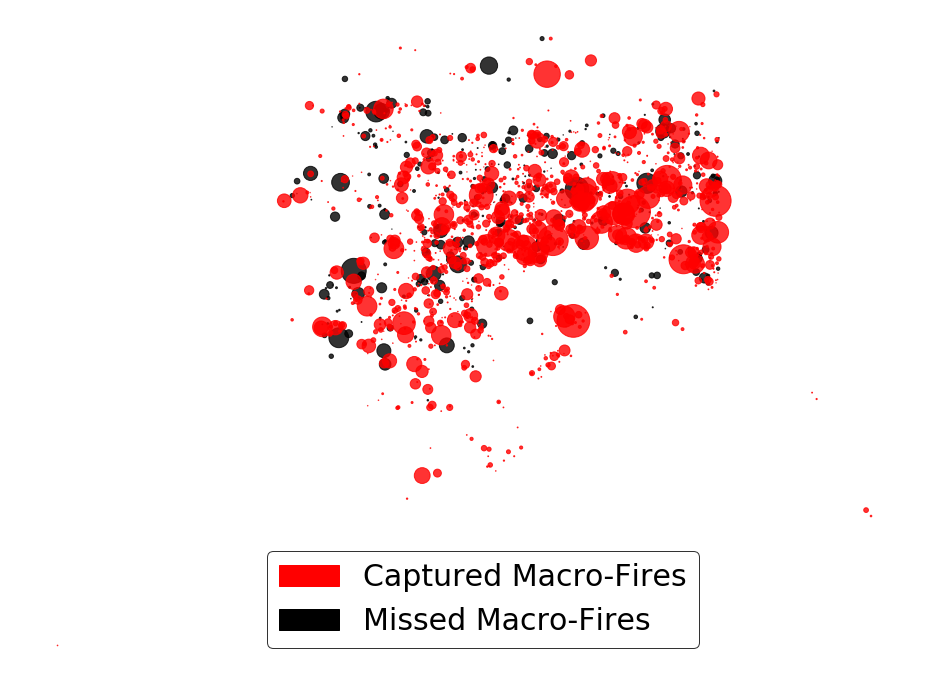

In [37]:
plt.figure(figsize=(16,12))

x=X_outliers[(X_outliers['FIRE_SIZE']>100)&(X_outliers['prediction']==-1)]['LONGITUDE']
y=X_outliers[(X_outliers['FIRE_SIZE']>100)&(X_outliers['prediction']==-1)]['LATITUDE']

x1=X_outliers[(X_outliers['FIRE_SIZE']>100)&(X_outliers['prediction']!=-1)]['LONGITUDE']
y1=X_outliers[(X_outliers['FIRE_SIZE']>100)&(X_outliers['prediction']!=-1)]['LATITUDE']

plt.scatter(x1,y1,color='k',s=(X_outliers['FIRE_SIZE']/500), alpha=0.8)
plt.scatter(x,y,color='r',s=(X_outliers['FIRE_SIZE']/500), alpha=0.8)

plt.axis('off')

red_patch = mpatches.Patch(color='r', label='Captured Macro-Fires')
black_patch = mpatches.Patch(color='k', label='Missed Macro-Fires')
plt.legend(handles=[red_patch, black_patch], loc=8, prop={'size': 30}, edgecolor='k')


plt.xlim(-180, -129)
plt.ylim(51, 71)

plt.show()

In [38]:
X_test = pd.concat([X_test, df[['LONGITUDE', 'LATITUDE']].iloc[:split,]], axis=1)

In [39]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,LATITUDE,LONGITUDE,DISCOVERY_DATE,FIRE_SIZE,MONTH,YEAR,tmax_5,tmin_5,prcp_5,snow_5,last_7,last_14,last_28,natural_cause
count,12820.000000,12820.000000,12820.000000,12820.000000,1.282000e+04,12820.000000,12820.000000,12820.000000,12820.000000,12820.000000,12820.000000,12820.000000,12820.000000,12820.000000,12820.000000,12820.000000
mean,287.166537,287.166537,62.967178,-149.164260,2.452904e+06,2512.393810,6.080109,2003.261466,18.180881,5.562722,3.871373,0.056708,32.836583,81.434243,176.468643,0.319657
std,187.340486,187.340486,2.475417,5.672706,2.627388e+03,19617.081643,1.292617,7.195018,8.591321,6.967755,19.796375,2.533276,77.729793,151.147925,292.980186,0.466362
min,0.000000,0.000000,51.531800,-178.802600,2.448718e+06,0.010000,1.000000,1992.000000,-51.100000,-57.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133.000000,133.000000,61.521397,-151.266662,2.450576e+06,0.100000,5.000000,1997.000000,14.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,267.000000,267.000000,63.180000,-149.225500,2.452862e+06,0.200000,6.000000,2003.000000,20.000000,6.100000,0.000000,0.000000,0.000000,15.000000,69.000000,0.000000
75%,413.000000,413.000000,64.833340,-146.801575,2.455340e+06,5.000000,7.000000,2010.000000,24.400000,10.000000,0.000000,0.000000,29.000000,106.000000,245.250000,1.000000
max,860.000000,860.000000,70.330600,-130.050833,2.457360e+06,606945.000000,12.000000,2015.000000,38.900000,403.900000,495.000000,254.000000,1515.000000,3803.000000,6265.000000,1.000000


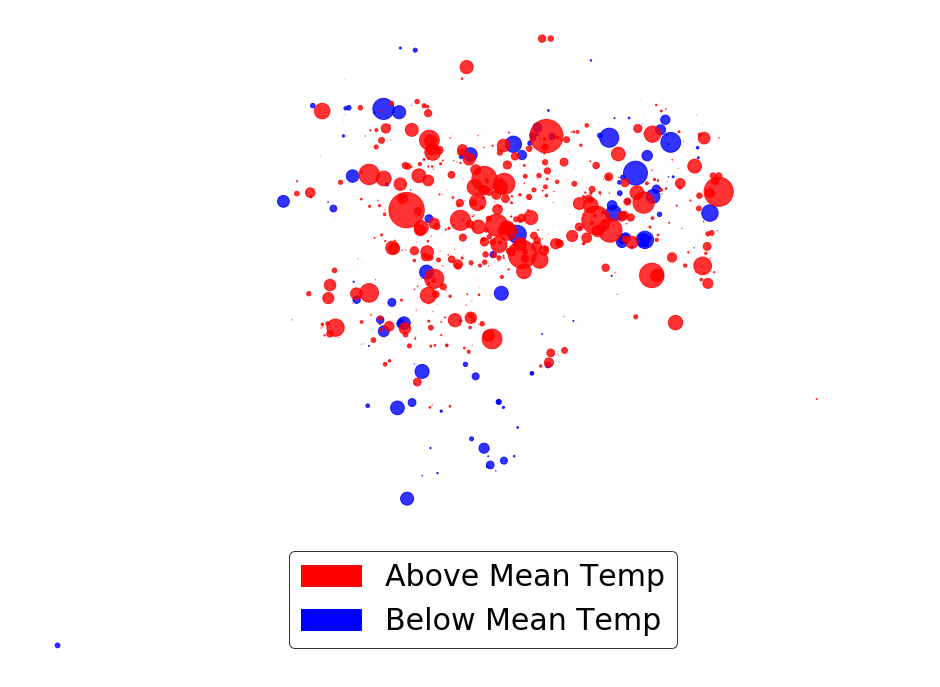

In [40]:
plt.figure(figsize=(16,12))

x=df[(df['FIRE_SIZE']>100)&(df['tmax_5']>18.180881)]['LONGITUDE']
y=df[(df['FIRE_SIZE']>100)&(df['tmax_5']>18.180881)]['LATITUDE']
x1=df[(df['FIRE_SIZE']>100)&(df['tmax_5']<18.180881)]['LONGITUDE']
y1=df[(df['FIRE_SIZE']>100)&(df['tmax_5']<18.180881)]['LATITUDE']

plt.scatter(x1,y1,color='b',s=(df['FIRE_SIZE']/250), alpha=.8)
plt.scatter(x,y,color='r',s=(df['FIRE_SIZE']/250), alpha=.8)

plt.axis('off')

red_patch = mpatches.Patch(color='r', label='Above Mean Temp')
black_patch = mpatches.Patch(color='b', label='Below Mean Temp')
plt.legend(handles=[red_patch, black_patch], loc=8, prop={'size': 30}, edgecolor='k')


plt.xlim(-180, -129)
plt.ylim(51, 71)

plt.show()

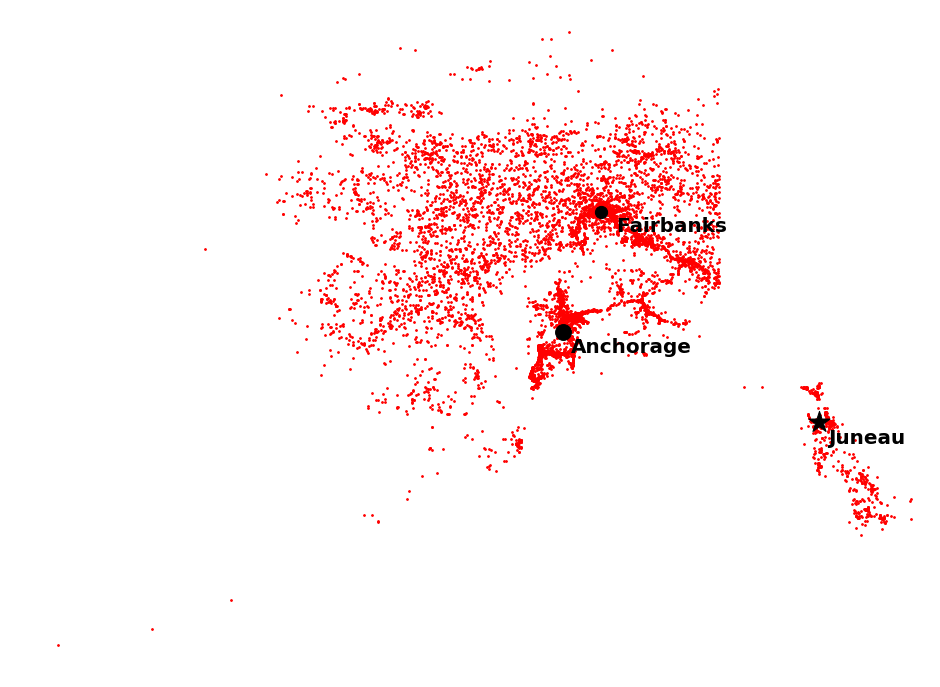

In [71]:
plt.figure(figsize=(16,12))

x=df['LONGITUDE']
y=df['LATITUDE']

plt.scatter(x,y,color='r', s=3)#,s=(df['FIRE_SIZE']/250), alpha=.1)

plt.scatter(-149.9450448,61.1471847,color='k',s=250)
plt.annotate('Anchorage',(-149.5,60.5),size=20,fontweight='bold')
plt.scatter(-147.7390415,64.828348,color='k',s=150)
plt.annotate('Fairbanks',(-146.9,64.2),size=20,fontweight='bold')
plt.scatter(-135.3186571,58.3801286,color='k',s=500,marker='*')
plt.annotate('Juneau',(-134.8,57.7),size=20,fontweight='bold')

plt.axis('off')

# red_patch = mpatches.Patch(color='r', label='Above Mean Temp')
# black_patch = mpatches.Patch(color='b', label='Below Mean Temp')
# plt.legend(handles=[red_patch, black_patch], loc=8, prop={'size': 30}, edgecolor='k')

plt.xlim(-180, -129)
plt.ylim(51, 71)

plt.show()

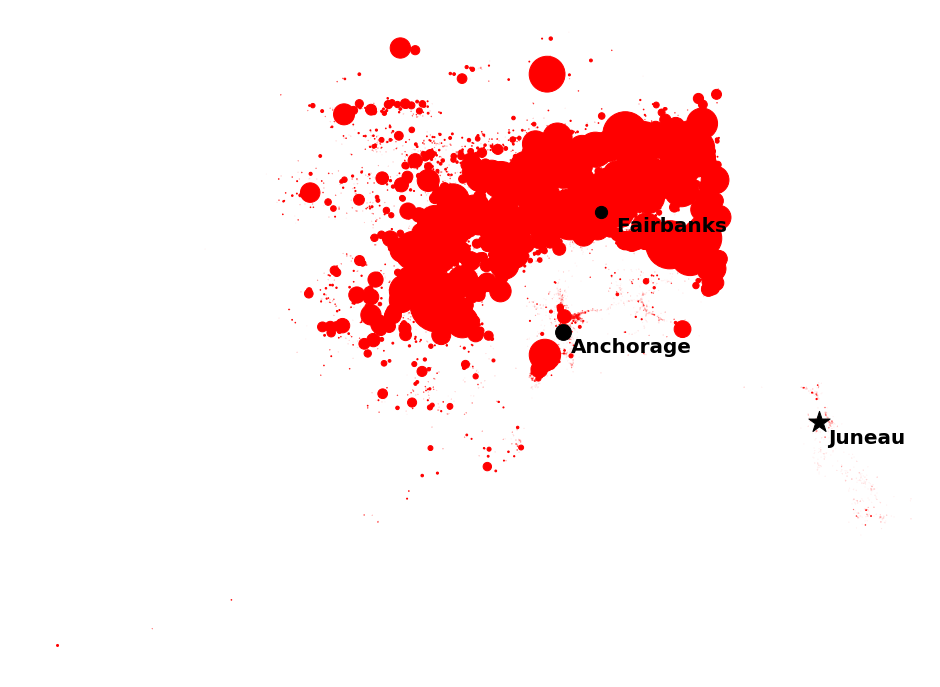

In [72]:
plt.figure(figsize=(16,12))

x=df['LONGITUDE']
y=df['LATITUDE']

# x1=df[df['STAT_CAUSE_DESCR']!='Lightning']['LONGITUDE']
# y1=df[df['STAT_CAUSE_DESCR']!='Lightning']['LATITUDE']

plt.scatter(x,y,color='r', s=(df['FIRE_SIZE']/200), alpha=1)
# plt.scatter(x1,y1,color='r', s=3

plt.scatter(-149.9450448,61.1471847,color='k',s=250)
plt.annotate('Anchorage',(-149.5,60.5),size=20,fontweight='bold')
plt.scatter(-147.7390415,64.828348,color='k',s=150)
plt.annotate('Fairbanks',(-146.9,64.2),size=20,fontweight='bold')
plt.scatter(-135.3186571,58.3801286,color='k',s=500,marker='*')
plt.annotate('Juneau',(-134.8,57.7),size=20,fontweight='bold')

plt.axis('off')

# red_patch = mpatches.Patch(color='r', label='Above Mean Temp')
# black_patch = mpatches.Patch(color='b', label='Below Mean Temp')
# plt.legend(handles=[red_patch, black_patch], loc=8, prop={'size': 30}, edgecolor='k')

plt.xlim(-180, -129)
plt.ylim(51, 71)

plt.show()